#### Thompson Sampling Reinforcement Learning Algorithm

![Thompson Sampling algorithm](../dataFiles/thompsonSamplingAlgorithm.png)
##### Objective
- Each add has a click through rate and the goal is to figure out which ad is most frequently clicked on ad (converts the most) in the minimum possible rounds


#### Importing Modules

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the dataset

In [22]:
dataset = pd.read_csv('../dataFiles/Ads_CTR_Optimisation.csv')

#### Implementing Thompson Sampling

In [23]:
import random
#requied variables
N = 350 # total no of users / rounds to who we show the add
d = 10 # no of adds
ads_selected = [] #full list of ads selected at each round

#Step 1 - create the variables for lists of rewards
numbers_of_reward_1 = [0] * d
numbers_of_reward_0 = [0] * d
total_reward =0 # accumulated reward

# iterate over the N rounds and show the adds
for n in range(0,N):
  ad = 0 # index of round selected at each round
  max_random= 0 # maximum of the draws
  for i in range(0,d):
    #thomson sampling step 2
    random_beta = random.betavariate(numbers_of_reward_1[i]+1, numbers_of_reward_0[i]+1)
    #thompson sampling step 3
    # compare random better to max_random
    if (random_beta >max_random):
      max_random = random_beta
      ad = i
  #update the variables
  ads_selected.append(ad) # append to the full list of adds selected
  reward = dataset.values[n,ad]
  if reward == 1:
    numbers_of_reward_1[ad] += 1
  else:
    numbers_of_reward_0[ad] += 1
  #update total accumulated reward
  total_reward += reward



##### Visualising the results

- plots number of times the ad was selected
- x axis has the different adds
- y axis has the number of times each add was selected

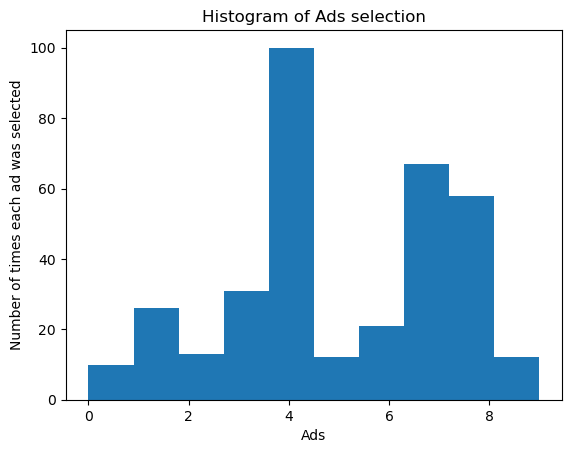

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of Ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#### Evaluation

- Thompson sampling is more powerful than UCB as it will figure the best ad with the highest conversion rate over shorter samples